#***Proyecto final - Clasificador de plantas de interior y exterior tóxicas para felinos***

**UNIVERSIDAD INDUSTRIAL DE SANTANDER - UIS FACULTAD DE INGENIERÍAS FÍSICO MECÁNICAS**

**ESCUELA DE INGENIERÍA DE SISTEMAS E INFORMÁTICA: INGENIERÍA DE SISTEMAS**

Prof. Gustavo Adolfo Garzón Villamizar

**22971 - INTELIGENCIA ARTIFICIAL I**
___

>**Estudiantes:**
*   Angélica María Sanabria Flórez - 2205564
*   Anyi Lorena Villabona Roa - 2215163
*   Karen Juliana Mora Jaimes - 2202027
___


#***Dataset***

___
>[House Plant Species](https://www.kaggle.com/datasets/kacpergregorowicz/house-plant-species): Este conjunto consta de 8.250 imágenes categorizadas en 47 clases de especies de plantas de interior y exterior en el hogar recopiladas de Bing Images y seleccionadas manualmente por el autor de este dataset.

>El objetivo del proyecto consiste en clasificar las especies de plantas en tóxicas o no tóxicas para los felinos.

___

>**Composición del conjunto de datos:**

*   El número de imágenes por clase se distribuye en 4.125 especies tóxicas y 4.125 especies no tóxicas


>**Características de la imagen:**

* Las imágenes varían en calidad y resolución.

* El conjunto de datos incluye imágenes de plantas completas y primeros planos de partes específicas de la planta.

* Las plantas se colocan en interiores y exteriores.

* Las imágenes están organizadas en carpetas separadas para cada categoría de planta.



#***Librerías***


In [3]:
import numpy as np
import os
import cv2
import shutil
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
from PIL import Image
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.17.1


In [4]:
!pip install scikit-image

##***Montando en el drive***


In [5]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


#***Tratamiento de datos***

##***Redimensionando las imágenes  (NO TOCAR)***


In [ ]:
a = "/content/drive/MyDrive/IA-1/ZZ Plant (Zamioculcas zamiifolia)"
mi_lista = os.listdir(a)
for i in mi_lista:
  print(i)
  img = mpimg.imread(os.path.join(a,i))
  #plt.imshow(img)
  #print(img.shape)
  #plt.show()
  img = resize(img, (80,100))
  #plt.imshow(img)
  #print(img.shape)
  #plt.show()
  plt.imsave(os.path.join(a,i),img)

##***Renombrando archivos con el nombre de su respectiva especie***


****Especies no tóxicas****

In [ ]:
# Ruta de la carpeta principal
base_path = '/content/drive/MyDrive/IA-1/especies-no-toxicas'

# Recorrer todas las subcarpetas dentro de la carpeta principal
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Verificar que sea una carpeta
    if os.path.isdir(folder_path):
        # Obtener todos los archivos en la carpeta
        files = os.listdir(folder_path)

        # Renombrar cada archivo
        for i, file_name in enumerate(files):
            # Obtener la extensión del archivo
            file_extension = os.path.splitext(file_name)[1]

            # Crear el nuevo nombre: nombre de carpeta + número + extensión
            new_name = f"{folder_name}_{i}{file_extension}"
            old_path = os.path.join(folder_path, file_name)
            new_path = os.path.join(folder_path, new_name)

            # Renombrar el archivo
            os.rename(old_path, new_path)

print("Renombrado completado.")


Renombrado completado.


****Especies tóxicas****

In [ ]:
# Ruta de la carpeta principal
base_path = '/content/drive/MyDrive/IA-1/especies-toxicas'

# Recorrer todas las subcarpetas dentro de la carpeta principal
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Verificar que sea una carpeta
    if os.path.isdir(folder_path):
        # Obtener todos los archivos en la carpeta
        files = os.listdir(folder_path)

        # Renombrar cada archivo
        for i, file_name in enumerate(files):
            # Obtener la extensión del archivo
            file_extension = os.path.splitext(file_name)[1]

            # Crear el nuevo nombre: nombre de carpeta + número + extensión
            new_name = f"{folder_name}_{i}{file_extension}"
            old_path = os.path.join(folder_path, file_name)
            new_path = os.path.join(folder_path, new_name)

            # Renombrar el archivo
            os.rename(old_path, new_path)

print("Renombrado completado.")


Renombrado completado.


##***Moviendo imagénes a su respectiva carpeta principal***


****Especies no tóxicas****

In [ ]:
# Ruta de la carpeta principal
base_path = '/content/drive/MyDrive/IA-1/especies-no-toxicas'

# Recorrer todas las subcarpetas dentro de la carpeta principal
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Verificar que sea una carpeta
    if os.path.isdir(folder_path):
        # Mover cada archivo en la subcarpeta a la carpeta principal
        for file_name in os.listdir(folder_path):
            old_path = os.path.join(folder_path, file_name)
            new_path = os.path.join(base_path, file_name)

            # Mover el archivo
            shutil.move(old_path, new_path)


print("Todas las imágenes han sido movidas a la carpeta principal.")


Todas las imágenes han sido movidas a la carpeta principal.


****Especies tóxicas****

In [ ]:
# Ruta de la carpeta principal
base_path = '/content/drive/MyDrive/IA-1/especies-toxicas'

# Recorrer todas las subcarpetas dentro de la carpeta principal
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Verificar que sea una carpeta
    if os.path.isdir(folder_path):
        # Mover cada archivo en la subcarpeta a la carpeta principal
        for file_name in os.listdir(folder_path):
            old_path = os.path.join(folder_path, file_name)
            new_path = os.path.join(base_path, file_name)

            # Mover el archivo
            shutil.move(old_path, new_path)


print("Todas las imágenes han sido movidas a la carpeta principal.")


Todas las imágenes han sido movidas a la carpeta principal.


In [ ]:
toxic_path = '/content/drive/MyDrive/IA-1/especies-toxicas'
non_toxic_path = '/content/drive/MyDrive/IA-1/especies-no-toxicas'
# Número de imágenes a eliminar
num_images_to_remove = 2928

# Obtener la lista de archivos en la carpeta de especies no tóxicas
toxic_images = os.listdir(toxic_path)

# Seleccionar aleatoriamente las imágenes para eliminar
images_to_remove = random.sample(toxic_images, num_images_to_remove)

# Eliminar las imágenes seleccionadas
for image_name in images_to_remove:
    image_path = os.path.join(toxic_path, image_name)
    try:
        os.remove(image_path)
        print(f"Eliminada: {image_path}")
    except Exception as e:
        print(f"No se pudo eliminar {image_path}: {e}")

print(f"Se han eliminado {num_images_to_remove} imágenes de {toxic_path}.")


Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/English Ivy (Hedera helix)_223.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Dumb Cane (Dieffenbachia spp.)_529.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Pothos (Ivy arum)_4.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Aloe Vera_52.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Begonia (Begonia spp.)_224.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Begonia (Begonia spp.)_146.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Dracaena_162.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Anthurium (Anthurium andraeanum)_109.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Anthurium (Anthurium andraeanum)_113.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Aloe Vera_107.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Tulip_203.jpg
Eliminada: /content/drive/MyDrive/IA-1/especies-toxicas/Rubber Plant (Ficus 

##***Cálculo y ploteo del promedio de las imágenes pertenecientes a la especie African Violet (Saintpaulia ionantha)***


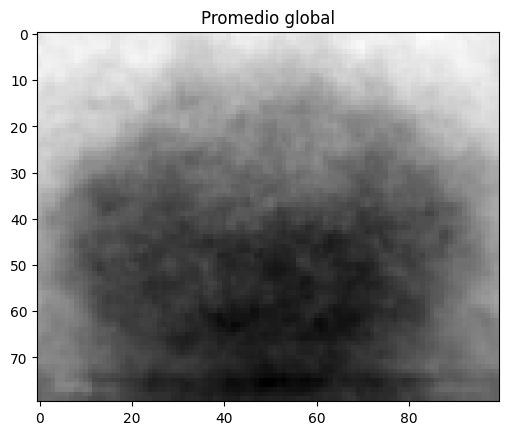

In [4]:
b = "/content/drive/MyDrive/IA-1/especies-no-toxicas/African Violet (Saintpaulia ionantha)"
mi_lista=os.listdir(os.path.join(b))
total=np.zeros((80,100))
n=len(mi_lista)
for i in mi_lista:
  img = mpimg.imread(os.path.join(b,i))
  img=img[:,:,0]
  total=total+img
avg_b=total/n
plt.imshow(avg_b, cmap= "gray")
plt.title("Promedio global")
plt.show()

##***Cálculo y ploteo de la desviación estándar de las imágenes pertenecientes a la especie African Violet (Saintpaulia ionantha)***


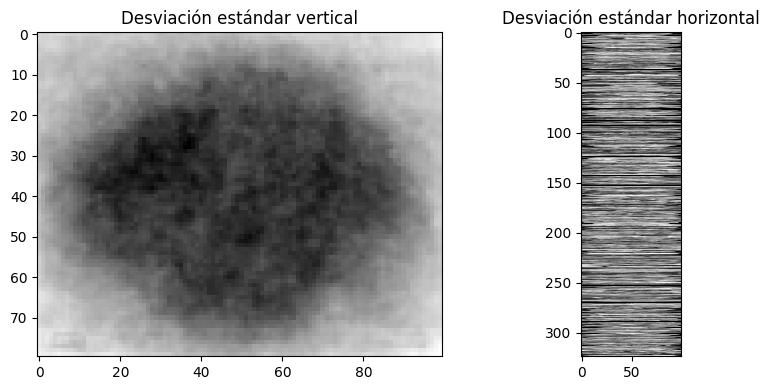

In [5]:
b = "/content/drive/MyDrive/IA-1/especies-no-toxicas/African Violet (Saintpaulia ionantha)"
all_img = []
mi_lista = os.listdir(os.path.join(b))
for i in mi_lista:
  img = mpimg.imread(os.path.join(b,i))
  img = img[:,:,0]
  all_img.append(img)
#Desviación estándar para el eje y
std_v = np.std(np.array(all_img), axis=0)
#Desviación estándar para el eje x
std_h = np.std(np.array(all_img), axis=1)
#Creación de subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
#Ploteo de ambos subplots
axes[0].imshow(std_v, cmap="gray")
axes[0].set_title("Desviación estándar vertical")
axes[1].imshow(std_h, cmap = "gray")
axes[1].set_title("Desviación estándar horizontal")
plt.tight_layout()
plt.show()

###***Definición de clases:***

* 0 especies-no-toxicas
* 1 especies-toxicas

##***Visualización general de las imágenes***

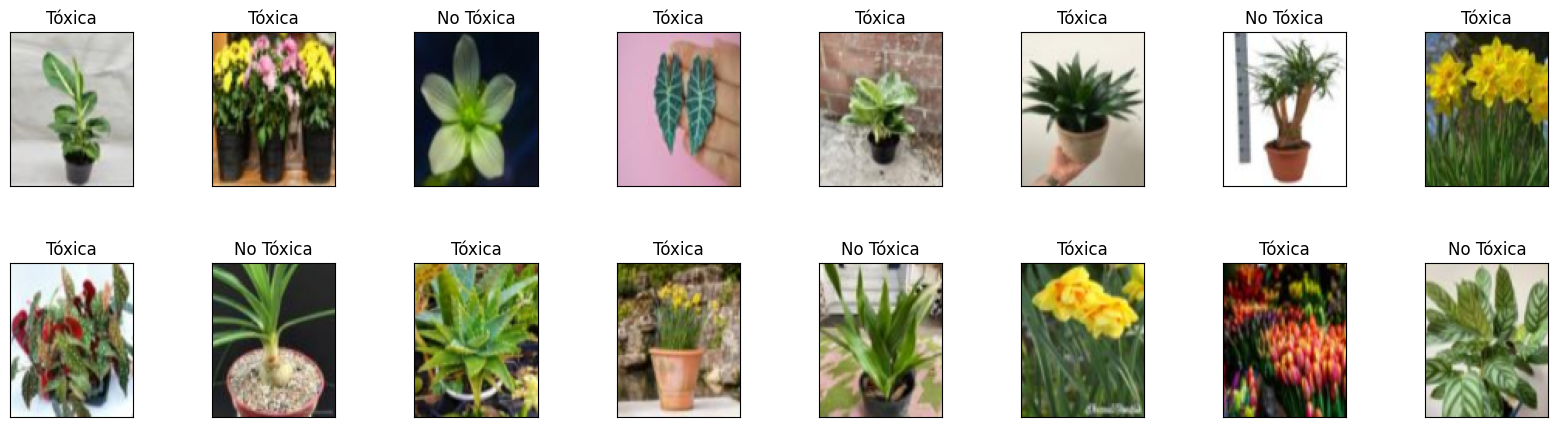

In [6]:
# Definición de rutas de acceso para las imágenes
toxic_path = '/content/drive/MyDrive/IA-1/especies-toxicas'
non_toxic_path = '/content/drive/MyDrive/IA-1/especies-no-toxicas'

# Definición de clases
toxicas_class = 1
no_toxicas_class = 0

# Inicialización de listas para almacenar los datos y las etiquetas
data = []  # imágenes
labels = []  # clases

# Definir las extensiones válidas de imágenes
valid_extensions = ['.jpg', '.jpeg', '.png', '.webp']
img_size = (80, 100)

# Cargando imágenes de especies no tóxicas con su asignación de etiquetas
for i in os.listdir(non_toxic_path):
    try:
        img_path = os.path.join(non_toxic_path, i)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = np.array(img, dtype='uint8')
            resized_img = cv2.resize(img, img_size)
            data.append(resized_img)
            labels.append(0)
    except Exception as e:
        print(f"Error con la imagen {i}: {e}")

# Cargando imágenes de especies tóxicas con su asignación de etiquetas
for j in os.listdir(toxic_path):
    try:
        img_path = os.path.join(toxic_path, j)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = np.array(img, dtype='uint8')
            resized_img = cv2.resize(img, img_size)
            data.append(resized_img)
            labels.append(1)
    except Exception as e:
        print(f"Error con la imagen {j}: {e}")

# Visualización de las imágenes cargadas
plt.figure(1, figsize=(20, 5))
n = 0
for i in range(16):
    n += 1
    r = np.random.randint(0, len(data), 1)
    plt.subplot(2, 8, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(data[r[0]])
    plt.title('{}'.format('Tóxica' if labels[r[0]] == 1 else 'No Tóxica'))
    plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
print(f'Mínimo valor de píxel: {np.min(resized_img)}')
print(f'Máximo valor de píxel: {np.max(resized_img)}')


Mínimo valor de píxel: 0
Máximo valor de píxel: 255


In [8]:
# Contar las imágenes en cada carpeta
toxic_images = os.listdir(toxic_path)
non_toxic_images = os.listdir(non_toxic_path)

print("Cantidad de imágenes:")
print(f"Especies tóxicas: {len(toxic_images)}")
print(f"Especies no tóxicas: {len(non_toxic_images)}")
print(f"Total de imágenes: {len(toxic_images) + len(non_toxic_images)}")

Cantidad de imágenes:
Especies tóxicas: 4125
Especies no tóxicas: 4125
Total de imágenes: 8250


##***Preparación del dataset***

In [9]:
print(f"Rango de los valores antes de normalizar: {np.min(data)} a {np.max(data)}")

Rango de los valores antes de normalizar: 0 a 255


In [10]:
data = np.array(data)
labels = np.array(labels)

np.random.seed(42)
tf.random.set_seed(42)

# Mezclando datos y etiquetas
p = np.random.permutation(data.shape[0])  # Generar una permutación aleatoria
data = data[p]  # Reordenar datos
labels = labels[p]  # Reordenar etiquetas

# Normalizando imágenes a rango [0, 1]
data = data.astype('float32') / 255.0  # Asegurándonos de que los valores estén entre 0 y 1
labels = labels.astype('int32')  # Etiquetas como enteros


# División del dataset para entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Verificación de las dimensiones después de la normalización y mezcla
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

# Aplanando las imágenes después de la división
X_train_f = X_train.reshape(X_train.shape[0], -1)
X_test_f = X_test.reshape(X_test.shape[0], -1)

data_f = data.reshape(data.shape[0], -1)
labels_f = labels

print(f'Dimensiones de los datos de entrenamiento (aplanados): {X_train_f.shape}')
print(f'Dimensiones de los datos de prueba (aplanados): {X_test_f.shape}')
print(f'Dimensiones de las etiquetas de entrenamiento: {y_train.shape}')
print(f'Dimensiones de las etiquetas de prueba: {y_test.shape}')


Tamaño de X_train: (6599, 100, 80, 3)
Tamaño de X_test: (1650, 100, 80, 3)
Tamaño de y_train: (6599,)
Tamaño de y_test: (1650,)
Dimensiones de los datos de entrenamiento (aplanados): (6599, 24000)
Dimensiones de los datos de prueba (aplanados): (1650, 24000)
Dimensiones de las etiquetas de entrenamiento: (6599,)
Dimensiones de las etiquetas de prueba: (1650,)


In [11]:
print(f"Rango de los valores después de normalizar: {np.min(data)} a {np.max(data)}")

Rango de los valores después de normalizar: 0.0 a 1.0


In [12]:
# Verificar el tipo de datos de las imágenes antes de la normalización
print(f'Tipo de datos de las imágenes antes de la normalización: {data.dtype}')

# Verificar los valores antes de la normalización en la primera imagen
print(f'Valor mínimo de píxel antes de normalización: {np.min(data)}')
print(f'Valor máximo de píxel antes de normalización: {np.max(data)}')

# Ejemplo de los primeros valores de la primera imagen cargada
print(f'Valores de la primera imagen cargada: {data[0]}')


Tipo de datos de las imágenes antes de la normalización: float32
Valor mínimo de píxel antes de normalización: 0.0
Valor máximo de píxel antes de normalización: 1.0
Valores de la primera imagen cargada: [[[0.23529412 0.29803923 0.12156863]
  [0.25882354 0.31764707 0.14509805]
  [0.28627452 0.3372549  0.16470589]
  ...
  [0.14117648 0.12941177 0.07058824]
  [0.10196079 0.09019608 0.03137255]
  [0.07843138 0.06666667 0.00784314]]

 [[0.24705882 0.30588236 0.13725491]
  [0.27058825 0.3254902  0.15686275]
  [0.2784314  0.32941177 0.15686275]
  ...
  [0.13333334 0.11764706 0.0627451 ]
  [0.10588235 0.09019608 0.03529412]
  [0.09019608 0.07843138 0.01960784]]

 [[0.2627451  0.3137255  0.15294118]
  [0.2784314  0.33333334 0.16470589]
  [0.27058825 0.32156864 0.14901961]
  ...
  [0.10588235 0.09019608 0.04313726]
  [0.09411765 0.08235294 0.03137255]
  [0.09019608 0.07843138 0.02745098]]

 ...

 [[0.27058825 0.2509804  0.12941177]
  [0.18039216 0.16470589 0.04705882]
  [0.12941177 0.1254902  0.

In [13]:
# Verificar rango antes del aplanamiento
print(f'Rango antes de aplanar: Min = {np.min(data)}, Max = {np.max(data)}')

# Aplanar imágenes
data_f = data.reshape(data.shape[0], -1)

# Verificar rango después de aplanar
print(f'Rango después de aplanar: Min = {np.min(data_f)}, Max = {np.max(data_f)}')


Rango antes de aplanar: Min = 0.0, Max = 1.0
Rango después de aplanar: Min = 0.0, Max = 1.0


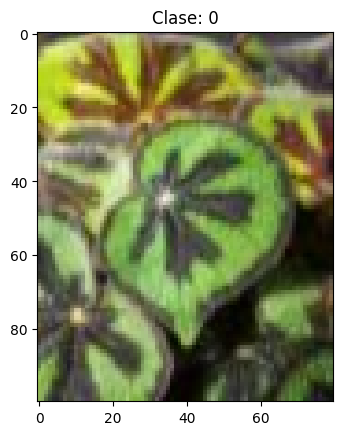

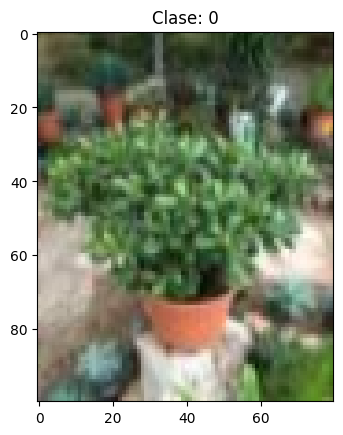

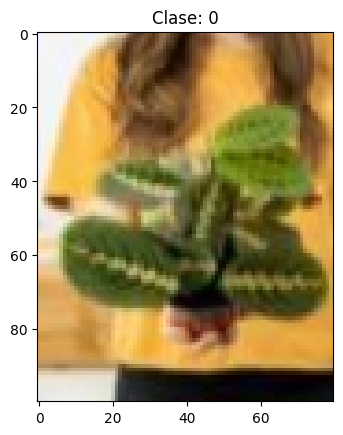

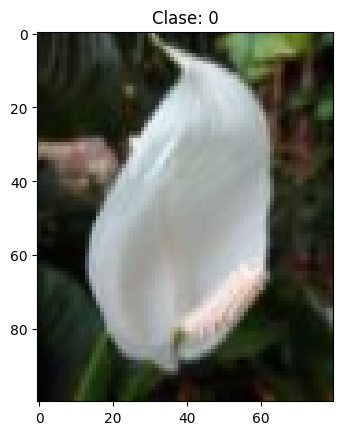

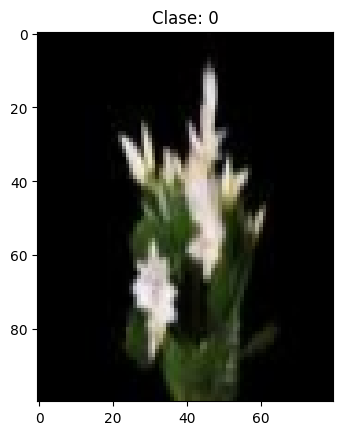

In [14]:
import matplotlib.pyplot as plt

# Mostrar algunas imágenes de entrenamiento
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f'Clase: {np.argmax(y_train[i])}')
    plt.show()


#***Segunda entrega***

##***1. Implementación de métodos de clasificación con parámetros por defecto***

###***Decision Tree classifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

est_DT = DecisionTreeClassifier()
est_DT.fit(X_train_f, y_train)
y_pred = est_DT.predict(X_test_f)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy del DecisionTreeClassifier: {accuracy:.4f}")


Accuracy del DecisionTreeClassifier: 0.5702


###***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

est_RF = RandomForestClassifier()
est_RF.fit(X_train_f, y_train)
y_pred = est_RF.predict(X_test_f)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy del RandomForestClassifier: {accuracy:.4f}")


Accuracy del RandomForestClassifier: 0.6422


###***Support Vector Classifier***

In [ ]:
from sklearn.svm import SVC

est_SVC = SVC()
est_SVC.fit(X_train_f,y_train)
y_pred = est_SVC.predict(X_test_f)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy del SVC/C: {accuracy:.4f}")

Accuracy del SVC/C: 0.6704


##***2. Tunning de parámetros***

###***a) Train_test_split***

####***DecisionTreeClassifier***

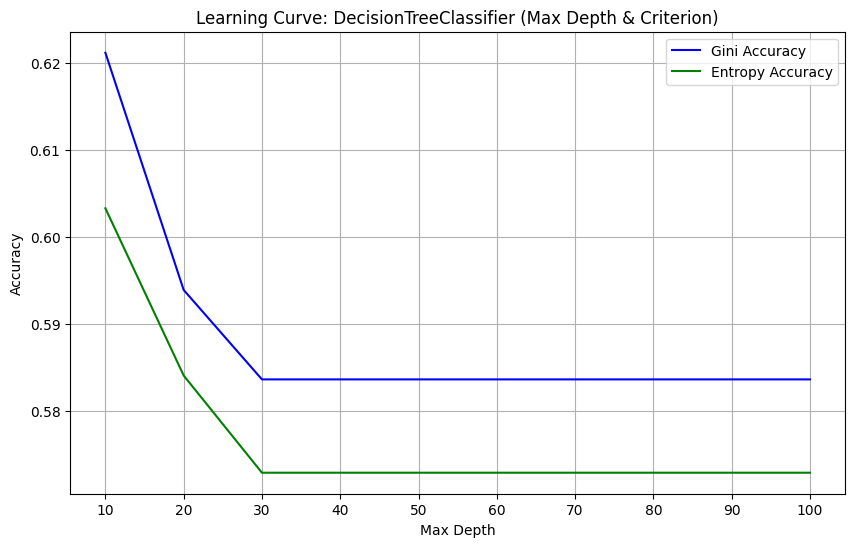

In [ ]:
def show_curve_decision_tree(X_train_f, X_test_f, y_train, y_test):
    # Inicializar listas para almacenar los resultados
    means_gini = []
    means_entropy = []

    # Rango para max_depth
    max_depth_range = range(10, 101, 10)  # Profundidad de 10 a 100 en pasos de 10

    # Iterar sobre diferentes valores de max_depth
    for max_depth in max_depth_range:
        # Modelo con criterio Gini
        est_gini = DecisionTreeClassifier(max_depth=max_depth, criterion='gini', random_state=42)
        est_gini.fit(X_train_f, y_train)
        pred_gini = est_gini.predict(X_test_f)
        accuracy_gini = accuracy_score(y_test, pred_gini)
        means_gini.append(accuracy_gini)

        # Modelo con criterio Entropy
        est_entropy = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
        est_entropy.fit(X_train_f, y_train)
        pred_entropy = est_entropy.predict(X_test_f)
        accuracy_entropy = accuracy_score(y_test, pred_entropy)
        means_entropy.append(accuracy_entropy)

    # Gráfica de resultados
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, means_gini, label="Gini Accuracy", color='blue')
    plt.plot(max_depth_range, means_entropy, label="Entropy Accuracy", color='green')
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve: DecisionTreeClassifier (Max Depth & Criterion)")
    plt.xticks(max_depth_range)
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función
show_curve_decision_tree(X_train_f, X_test_f, y_train, y_test)


####***RandomForestClassifier***

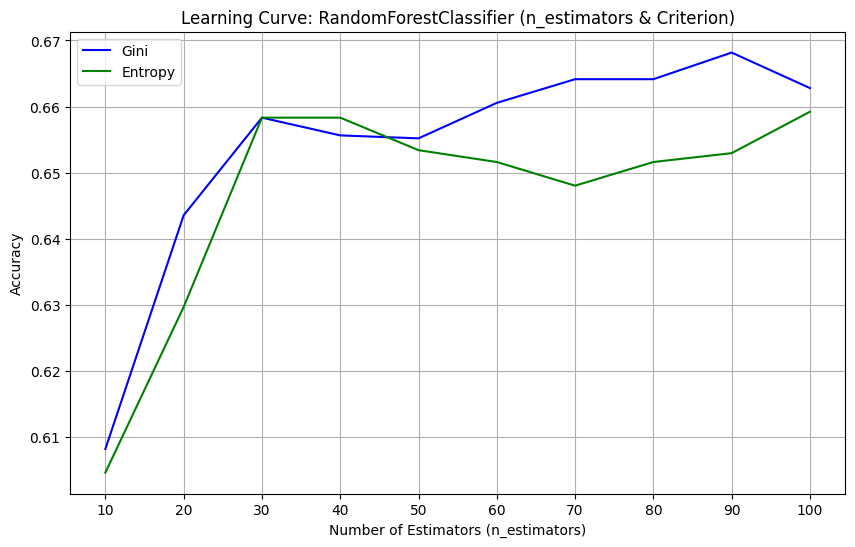

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def show_curve_random_forest(X_train_f, X_test_f, y_train, y_test):
    # Inicializar listas para guardar los resultados
    means_gini = []
    means_entropy = []

    # Rango de n_estimators
    n_estimators_range = range(10, 101, 10)  # Número de árboles: 10, 20, ..., 100

    for n_estimators in n_estimators_range:
        # Modelo con criterio Gini
        est_gini = RandomForestClassifier(n_estimators=n_estimators, criterion='gini', random_state=42)
        est_gini.fit(X_train_f, y_train)
        pred_gini = est_gini.predict(X_test_f)
        accuracy_gini = accuracy_score(y_test, pred_gini)
        means_gini.append(accuracy_gini)

        # Modelo con criterio Entropy
        est_entropy = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', random_state=42)
        est_entropy.fit(X_train_f, y_train)
        pred_entropy = est_entropy.predict(X_test_f)
        accuracy_entropy = accuracy_score(y_test, pred_entropy)
        means_entropy.append(accuracy_entropy)

    # Graficar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, means_gini, label="Gini", color='blue')
    plt.plot(n_estimators_range, means_entropy, label="Entropy", color='green')
    plt.xlabel("Number of Estimators (n_estimators)")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve: RandomForestClassifier (n_estimators & Criterion)")
    plt.legend()
    plt.grid(True)
    plt.xticks(n_estimators_range)
    plt.show()

# Llamada a la función
show_curve_random_forest(X_train_f, X_test_f, y_train, y_test)


####***SupportVectorMachine/C***

In [ ]:
def show_curve_svc(X_train_f, X_test_f, y_train, y_test):
    # Lista de kernels a evaluar
    kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    # Valores de gamma a evaluar
    gamma_range = np.logspace(-3, 2, 6)

    # Inicializar diccionario para guardar los resultados
    results = {kernel: [] for kernel in kernels}

    for kernel in kernels:
        for gamma in gamma_range:
            # Crear y entrenar el modelo con los parámetros actuales
            model = SVC(kernel=kernel, gamma=gamma, random_state=42)
            model.fit(X_train_f, y_train)
            # Predecir y calcular la precisión
            pred = model.predict(X_test_f)
            accuracy = accuracy_score(y_test, pred)
            results[kernel].append(accuracy)

    # Graficar resultados
    plt.figure(figsize=(12, 8))
    for kernel in kernels:
        plt.plot(gamma_range, results[kernel], label=f"Kernel: {kernel}")

    plt.xscale('log')
    plt.xlabel("Gamma (log scale)")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve: SVC (Kernel & Gamma)")
    plt.legend()
    plt.grid(True)
    plt.xticks(gamma_range, labels=[f"{g:.3f}" for g in gamma_range])
    plt.show()

# Llamada a la función
show_curve_svc(X_train_f, X_test_f, y_train, y_test)


###***b) Cross_val_score***

In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, data_f, labels_f, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    #means = np.r_[means]
    #stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()
    plt.show()

####***DecisionTreeClassifier***

In [ ]:
#@title **code** using DTC
from sklearn.tree import DecisionTreeClassifier
show_curve(DecisionTreeClassifier())

####***RandomForestClassifier***

In [ ]:
#@title **code** using RFC
from sklearn.ensemble import RandomForestClassifier
show_curve(RandomForestClassifier())

####***SVC/C***

In [ ]:
#@title **code** using SVC
from sklearn.ensemble import SVC
show_curve(SVC())

#***Tercera entrega***

In [ ]:
# Verificar distribución de clases en el conjunto de entrenamiento
train_class_distribution = pd.Series(y_train).value_counts()
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_class_distribution)

# Verificar distribución de clases en el conjunto de prueba
test_class_distribution = pd.Series(y_test).value_counts()
print("\nDistribución de clases en el conjunto de prueba:")
print(test_class_distribution)


Distribución de clases en el conjunto de entrenamiento:
1    3320
0    3279
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
0    845
1    805
Name: count, dtype: int64


####***Perceptrón multicapa con tres capas ocultas***

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,076,801 (11.74 MB)

 Trainable params: 3,076,801 (11.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.5366 - loss: 1.1009 - val_accuracy: 0.5303 - val_loss: 0.7148
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5677 - loss: 0.7517 - val_accuracy: 0.4921 - val_loss: 0.7843
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.5657 - loss: 0.7134 - val_accuracy: 0.5909 - val_loss: 0.6704
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5980 - loss: 0.6723 - val_accuracy: 0.5988 - val_loss: 0.6617
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.6033 - loss: 0.6537 - val_accuracy: 0.6067 - val_loss: 0.6605
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.6109 - loss: 0.6483 - val_accuracy: 0.6055 - val_loss: 0.6621
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.6163 - loss: 0.6446 - val_accuracy: 0.5939 - val_loss: 0.6635
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6178 - loss: 0.6425 - val

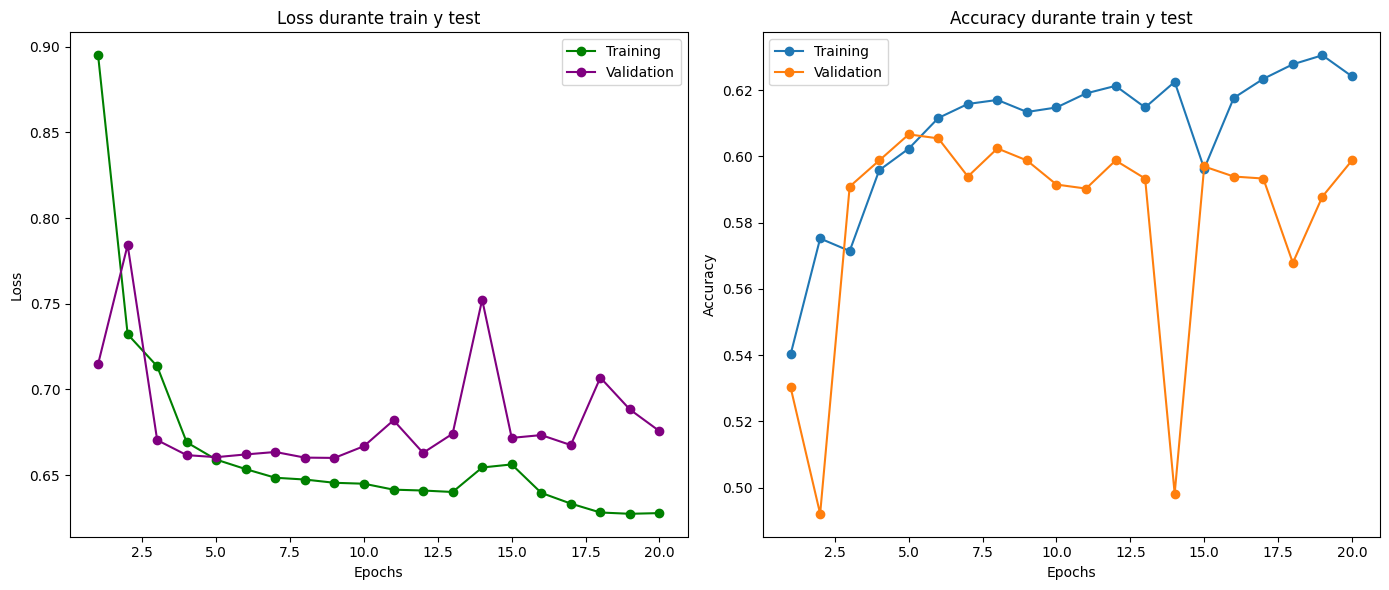

In [ ]:
model = Sequential()
input_shape = X_train_f.shape[1]
model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(X_train_f, y_train, epochs=20, batch_size=32, validation_data=(X_test_f, y_test))
predictions = model.predict(X_test_f)

# Evaluación en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_f, y_test)
y_pred = (predictions > 0.5)
accuracy_s = accuracy_score(y_test, y_pred)

print(f"Loss en el conjunto de prueba: {test_loss}")
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print(f"Accuracy score: {accuracy_s}")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(14, 6))

# Gráfica de loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training', marker='o', color='green')
plt.plot(epochs, val_loss, label='Validation', marker='o', color='purple')
plt.title('Loss durante train y test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfica de accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training', marker='o')
plt.plot(epochs, val_accuracy, label='Validation', marker='o')
plt.title('Accuracy durante train y test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

####***Perceptrón multicapa con seis capas ocultas***

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)                    │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,107,329 (11.85 MB)

 Trainable params: 3,107,329 (11.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.5290 - loss: 0.7928 - val_accuracy: 0.4897 - val_loss: 0.9302
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5579 - loss: 0.6993 - val_accuracy: 0.5903 - val_loss: 0.6702
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5871 - loss: 0.6686 - val_accuracy: 0.5770 - val_loss: 0.6792
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.5968 - loss: 0.6637 - val_accuracy: 0.5836 - val_loss: 0.6745
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5868 - loss: 0.6591 - val_accuracy: 0.5933 - val_loss: 0.6681
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5942 - loss: 0.6553 - val_accuracy: 0.5915 - val_loss: 0.6615
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.6025 - loss: 0.6515 - val_accuracy: 0.5855 - val_loss: 0.6738
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5970 - loss: 0.6507 - val

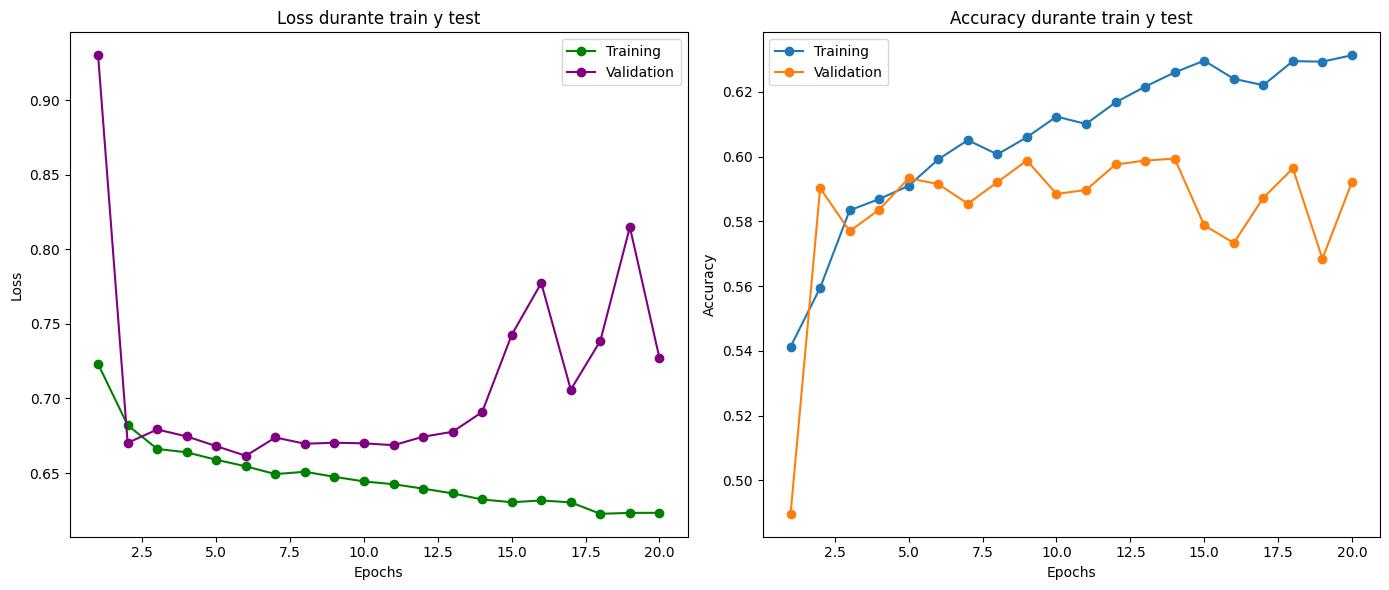

In [ ]:
model = Sequential()
input_shape = X_train_f.shape[1]
model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(X_train_f, y_train, epochs=20, batch_size=32, validation_data=(X_test_f, y_test))

# Evaluación en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_f, y_test)
predictions = model.predict(X_test_f)
y_pred = (predictions > 0.5)
accuracy_s = accuracy_score(y_test, y_pred)

print(f"Loss en el conjunto de prueba: {test_loss}")
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print(f"Accuracy score: {accuracy_s}")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(14, 6))

# Gráfica de loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training', marker='o', color='green')
plt.plot(epochs, val_loss, label='Validation', marker='o', color='purple')
plt.title('Loss durante train y test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfica de accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training', marker='o')
plt.plot(epochs, val_accuracy, label='Validation', marker='o')
plt.title('Accuracy durante train y test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

####***Perceptrón multicapa con diez capas ocultas***

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_311 (Dense)                    │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_312 (Dense)                    │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_313 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_314 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_315 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_316 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_317 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_318 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_319 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_320 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_321 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,159,425 (12.05 MB)

 Trainable params: 3,159,425 (12.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.5229 - loss: 0.7006 - val_accuracy: 0.5861 - val_loss: 0.6813
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.5648 - loss: 0.6787 - val_accuracy: 0.5655 - val_loss: 0.6805
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.5794 - loss: 0.6695 - val_accuracy: 0.5921 - val_loss: 0.6747
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5825 - loss: 0.6632 - val_accuracy: 0.5879 - val_loss: 0.6642
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.5817 - loss: 0.6594 - val_accuracy: 0.5891 - val_loss: 0.6633
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5975 - loss: 0.6536 - val_accuracy: 0.5891 - val_loss: 0.6758
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5877 - loss: 0.6527 - val_accuracy: 0.5648 - val_loss: 0.6957
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.5879 - loss: 0.6512 - va

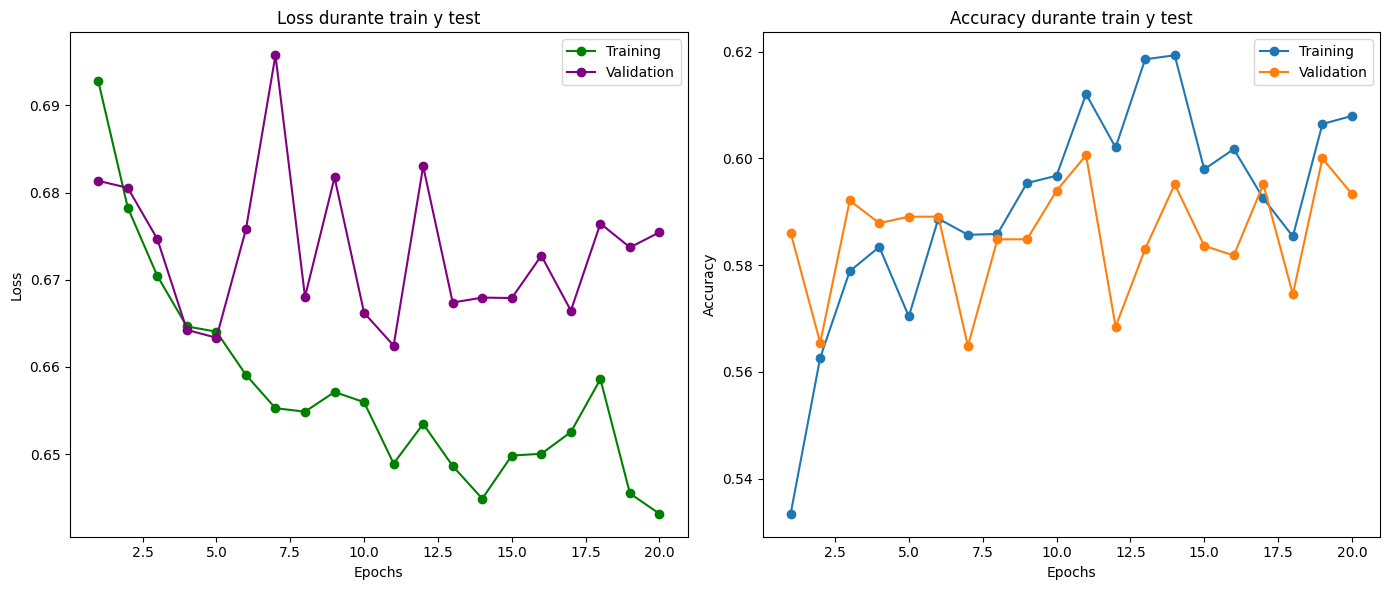

In [ ]:
model = Sequential()
input_shape = X_train_f.shape[1]
model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(X_train_f, y_train, epochs=20, batch_size=32, validation_data=(X_test_f, y_test))

test_loss, test_accuracy = model.evaluate(X_test_f, y_test)
predictions = model.predict(X_test_f)
y_pred = (predictions > 0.5)
accuracy_s = accuracy_score(y_test, y_pred)

print(f"Loss en el conjunto de prueba: {test_loss}")
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print(f"Accuracy score: {accuracy_s}")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(14, 6))

# Gráfica de loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training', marker='o', color='green')
plt.plot(epochs, val_loss, label='Validation', marker='o', color='purple')
plt.title('Loss durante train y test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Gráfica de accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training', marker='o')
plt.plot(epochs, val_accuracy, label='Validation', marker='o')
plt.title('Accuracy durante train y test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#***Punto 2) taller 8: Algoritmo genético***

Debido a restricciones en el entorno de ejecución con tiempos excesivos de procesamiento que excedían el límite permitido junto con el reinicio de la sesión, no fue posible ejecutar el código. Sin embargo, se encuentra desarrollado a continuación el punto:

In [ ]:
def crear_modelo(individuo):
  # individuo = [max_depth, min_samples_split, criterion]
  return DecisionTreeClassifier(max_depth=individuo[0],
                                 min_samples_split=individuo[1],
                                 criterion=individuo[2],
                                 random_state=42)

def fitness_function(individuo, X, y):
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores = []
  for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    modelo = crear_modelo(individuo)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    scores.append(accuracy)

  return np.mean(scores)  # Devuelve el promedio de las precisiones

def cruce(padre1, padre2):
  punto_cruce = random.randint(1, len(padre1) - 1)
  hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
  hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
  return hijo1, hijo2

def mutacion(individuo, tasa_mutacion):
  for i in range(len(individuo)):
    if random.random() < tasa_mutacion:
      if i == 0:  # max_depth
        individuo[i] = random.randint(5, 20)
      elif i == 1:  # min_samples_split
        individuo[i] = random.randint(2, 10)
      elif i == 2:  # criterion
        individuo[i] = random.choice(['gini', 'entropy'])
  return individuo

# Parámetros del algoritmo genético
tamano_poblacion = 50
num_generaciones = 10
tasa_mutacion = 0.1

# Inicializar la población
poblacion = [[random.randint(5, 20), random.randint(2, 10), random.choice(['gini', 'entropy'])]
             for _ in range(tamano_poblacion)]

# Evolución
mejor_individuo = None
mejor_fitness = 0

for generacion in range(num_generaciones):
  # Evaluar la población
  fitness_scores = [fitness_function(individuo, data_f, labels_f) for individuo in poblacion]

  # Encontrar al mejor individuo
  mejor_fitness_generacion = max(fitness_scores)
  mejor_individuo_generacion = poblacion[fitness_scores.index(mejor_fitness_generacion)]

  if mejor_fitness_generacion > mejor_fitness:
    mejor_fitness = mejor_fitness_generacion
    mejor_individuo = mejor_individuo_generacion

def seleccionar_padres_ruleta(poblacion, fitness_scores):
  total_fitness = sum(fitness_scores)
  probabilidades = [fitness / total_fitness for fitness in fitness_scores]
  padre1 = random.choices(poblacion, weights=probabilidades)[0]
  padre2 = random.choices(poblacion, weights=probabilidades)[0]
  return padre1, padre2


  # Cruce y mutación para crear la nueva generación
  nueva_poblacion = []
  for _ in range(tamano_poblacion // 2):
    padre1, padre2 = seleccionar_padres_ruleta(poblacion, fitness_scores)
    hijo1, hijo2 = cruce(padre1, padre2)
    nueva_poblacion.extend([mutacion(hijo1, tasa_mutacion), mutacion(hijo2, tasa_mutacion)])

  poblacion = nueva_poblacion
  # Graficar la evolución del fitness
  plt.plot(range(num_generaciones), mejores_fitness_por_generacion)
  plt.xlabel("Generación")
  plt.ylabel("Mejor Fitness")
  plt.title("Evolución del Fitness")
  plt.show()